In [1]:
# import the usual modules
# to manage directories
import os
# to handle matrix computations
import numpy as np
# to handle tabular data
import pandas as pd
# to handle plots and graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# if fanalysis is already installed, import it - else install and import it
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA

In [3]:
# get current working directory
os.getcwd()

'/Users/fulin/Documents/GitHub/EMLyon_DSAIS/Elementary_models/homework_version2'

In [4]:
os.chdir(os.path.join(os.getcwd(), "data"))
os.getcwd()

'/Users/fulin/Documents/GitHub/EMLyon_DSAIS/Elementary_models/homework_version2/data'

In [5]:
# import data from Excel file - index_col = 0 indicates that the first column is a label
D = pd.read_csv('crime_en.txt', sep='\t', index_col=0)
# D = pandas.read_csv("customer_data_quant.csv", index_col=0)

# print dataset summary
print(D.info())

# define dimensions of [X] matrix : number of variables
p = D.shape[1]

# define sample size of [X] : number of observations
n = D.shape[0]

# define values of matrix [X]
X = D.values

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   murder            50 non-null     float64
 1   rape              50 non-null     float64
 2   armedrobbery      50 non-null     float64
 3   aggression        50 non-null     float64
 4   breakintheft      50 non-null     float64
 5   pickpocketing     50 non-null     float64
 6   trafficviolation  50 non-null     float64
dtypes: float64(7)
memory usage: 3.1+ KB
None


In [6]:
type(PCA())

fanalysis.pca.PCA

In [7]:
# instantiate acp object form PCA class
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)

# run PCA on X observed data
acp.fit(X)

# print methods and attributes of acp object
dir(acp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'col_contrib_',
 'col_coord_',
 'col_cor_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_topandas',
 'correlation_circle',
 'eig_',
 'eigen_vectors_',
 'fit',
 'fit_transform',
 'get_metadata_r

In [8]:
acp.col_labels

Index(['murder', 'rape', 'armedrobbery', 'aggression', 'breakintheft',
       'pickpocketing', 'trafficviolation'],
      dtype='object')

In [9]:
acp.row_labels

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='statename')

### Determine the number of factors

In [10]:
# print eigenvalues (the lambdas) - output includes proportion of variance explained and cumulated values thereof
print(acp.eig_)

[[  4.11495951   1.23872183   0.72581663   0.31643205   0.25797446
    0.22203947   0.12405606]
 [ 58.78513586  17.69602616  10.36880895   4.5204578    3.68534942
    3.17199245   1.77222937]
 [ 58.78513586  76.48116202  86.84997097  91.37042876  95.05577818
   98.22777063 100.        ]]


In [11]:
type(acp.eig_), acp.eig_.shape

(numpy.ndarray, (3, 7))

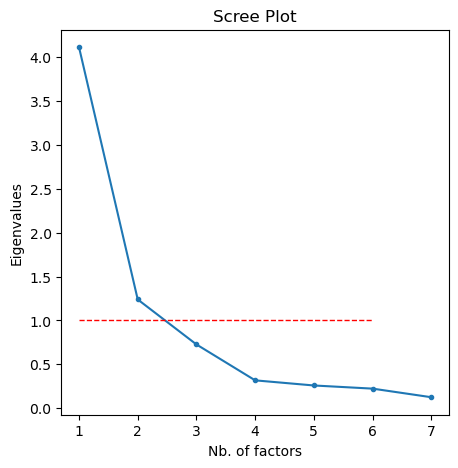

In [12]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,6],[1,1],"r--",linewidth=1)

plt.show()

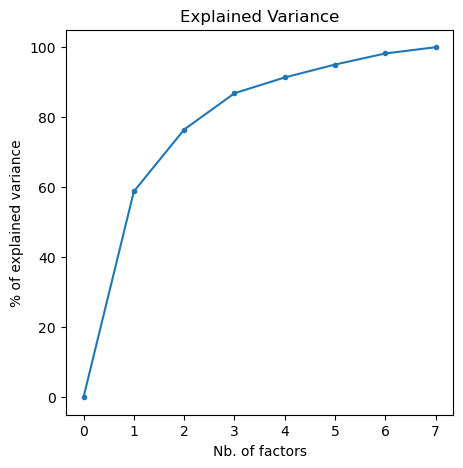

In [13]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [14]:
# Applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

Barlett's statistics: 219.506
p-value: 0.000


In [15]:
# Computing Karlis-Saporta-Spinaki threshold
# impor math package
import math

#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 1.700


thresholds for the broken sticks: [2.59285714 1.59285714 1.09285714 0.75952381 0.50952381 0.30952381
 0.14285714]


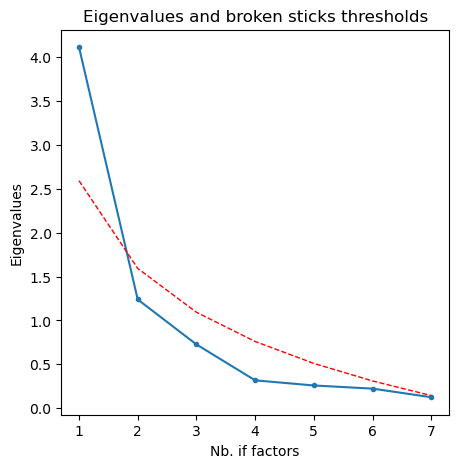

In [16]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

### Variables representation

In [17]:
# Correlation between variables and factors
import pandas
print(pandas.DataFrame(acp.col_coord_[:,:2],index=D.columns, columns=['F1','F2']))

                        F1        F2
murder           -0.609127 -0.700258
rape             -0.875840 -0.188578
armedrobbery     -0.805076  0.047020
aggression       -0.804622 -0.382340
breakintheft     -0.892875  0.226314
pickpocketing    -0.724917  0.447773
trafficviolation -0.598777  0.559184


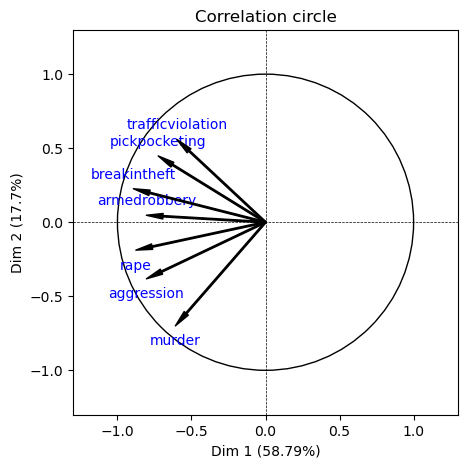

In [18]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))

In [19]:
# Cos² if the variables on the two first factors
print(pandas.DataFrame(acp.col_cos2_[:,:2],index=D.columns, columns=['F1','F2']))

                        F1        F2
murder            0.371036  0.490361
rape              0.767095  0.035562
armedrobbery      0.648148  0.002211
aggression        0.647417  0.146184
breakintheft      0.797226  0.051218
pickpocketing     0.525504  0.200500
trafficviolation  0.358534  0.312687


In [20]:
# Cumulated Cos² on the two first factors
print(pandas.DataFrame(np.cumsum(acp.col_cos2_[:,:2],axis=1),index=D.columns, columns=['F1','F2']))

                        F1        F2
murder            0.371036  0.861397
rape              0.767095  0.802656
armedrobbery      0.648148  0.650359
aggression        0.647417  0.793601
breakintheft      0.797226  0.848443
pickpocketing     0.525504  0.726005
trafficviolation  0.358534  0.671220


In [21]:
# Contributions of each variable on the two first factors (in %)
print(pandas.DataFrame(acp.col_contrib_[:,:2],index=D.columns, columns=['F1','F2']))

                         F1         F2
murder             9.016757  39.586048
rape              18.641615   2.870826
armedrobbery      15.751016   0.178481
aggression        15.733257  11.801159
breakintheft      19.373837   4.134739
pickpocketing     12.770583  16.186068
trafficviolation   8.712935  25.242679


### Individuals representation

In [22]:
# individuals factor coordinates on the first plan (of the two first axes)
print(pandas.DataFrame(acp.row_coord_[:,:2],index=D.index))

                       0         1
statename                         
Alabama         0.050387 -2.117383
Alaska         -2.446100  0.168214
Arizona        -3.044739  0.853523
Arkansas        1.065115 -1.359100
California     -4.327295  0.144641
Colorado       -2.534768  0.925902
Connecticut     0.546825  1.516471
Delaware       -0.974374  1.309908
Florida        -3.143346 -0.610048
Georgia        -0.495386 -1.394807
Hawaii         -0.831488  1.842436
Idaho           1.446997 -0.008087
Illinois       -0.518110  0.095187
Indiana         0.504971  0.000026
Iowa            2.607771  0.833127
Kansas          0.640504 -0.028326
Kentucky        1.744441 -1.158273
Louisiana      -1.131575 -2.104424
Maine           1.844852  0.584661
Maryland       -2.204959 -0.196719
Massachusetts  -0.988373  2.657766
Michigan       -2.296415  0.156446
Minnesota       1.570123  1.067163
Mississippi     1.522662 -2.572569
Missouri       -0.562015 -0.564181
Montana         1.684948  0.273743
Nebraska        2.17

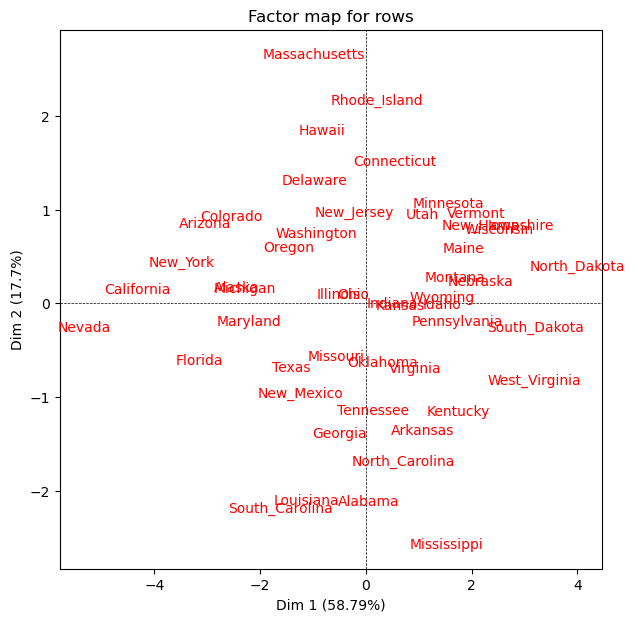

In [23]:
# chart of the individuals
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(7,7))

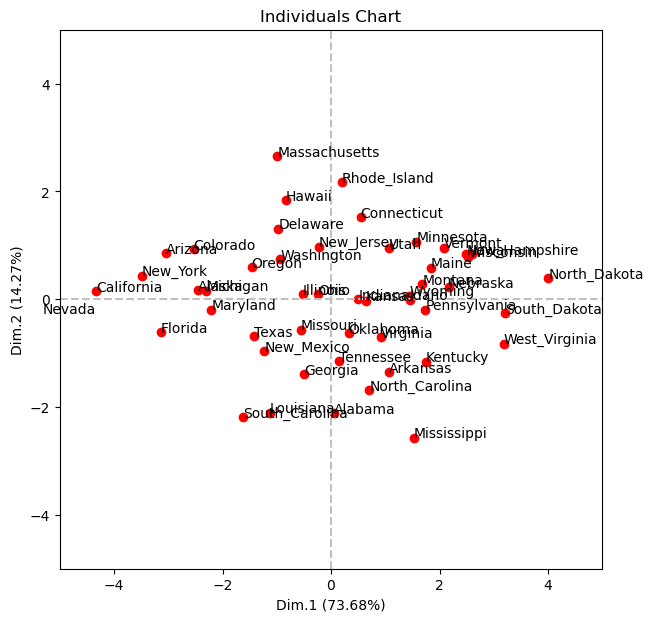

In [24]:
# plot with square scales
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'ro')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (73.68%)")
ax.set_ylabel("Dim.2 (14.27%)")
plt.title("Individuals Chart")

for i in range(n):
    ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i])
    
plt.show()

In [25]:
# standardized data points
Z = (D.values - acp.means_) / acp.std_

# distance to origin from the standardized data
disto = np.apply_along_axis(arr=Z,axis=1,func1d=lambda x: np.sum(x**2))

# distance to origin from the factor coordinates
distoBis = np.sum(acp.row_coord_**2,axis=1)

# compare in a dataframe : distance should be preserved
print(pandas.DataFrame(np.transpose(np.array([disto,distoBis])),index=D.index, columns=['original','factor']))

                 original     factor
statename                           
Alabama          5.266560   5.266560
Alaska          12.105650  12.105650
Arizona         14.397413  14.397413
Arkansas         3.233514   3.233514
California      19.193089  19.193089
Colorado         8.848628   8.848628
Connecticut      3.357177   3.357177
Delaware         3.335068   3.335068
Florida         12.912639  12.912639
Georgia          2.410914   2.410914
Hawaii           7.663926   7.663926
Idaho            2.558940   2.558940
Illinois         2.446953   2.446953
Indiana          0.633147   0.633147
Iowa             8.153845   8.153845
Kansas           0.835077   0.835077
Kentucky         5.306802   5.306802
Louisiana        6.485680   6.485680
Maine            4.854723   4.854723
Maryland         7.278708   7.278708
Massachusetts   18.240427  18.240427
Michigan         6.173498   6.173498
Minnesota        3.859666   3.859666
Mississippi     10.258247  10.258247
Missouri         1.098122   1.098122
M

In [26]:
# cos² of the individuals
lig_cos2 = np.apply_along_axis(arr=acp.row_coord_[:,:2],axis=0,func1d=lambda x: (x**2)/disto)
print(pandas.DataFrame(lig_cos2,index=D.index, columns=['F1','F2']))

                      F1            F2
statename                             
Alabama         0.000482  8.512788e-01
Alaska          0.494265  2.337408e-03
Arizona         0.643896  5.059952e-02
Arkansas        0.350848  5.712525e-01
California      0.975637  1.090030e-03
Colorado        0.726107  9.688450e-02
Connecticut     0.089068  6.850051e-01
Delaware        0.284673  5.144899e-01
Florida         0.765190  2.882126e-02
Georgia         0.101790  8.069499e-01
Hawaii          0.090211  4.429282e-01
Idaho           0.818229  2.555838e-05
Illinois        0.109703  3.702806e-03
Indiana         0.402743  1.092273e-09
Iowa            0.834020  8.512550e-02
Kansas          0.491267  9.608469e-04
Kentucky        0.573429  2.528069e-01
Louisiana       0.197429  6.828278e-01
Maine           0.701066  7.041154e-02
Maryland        0.667954  5.316660e-03
Massachusetts   0.053556  3.872563e-01
Michigan        0.854219  3.964584e-03
Minnesota       0.638730  2.950608e-01
Mississippi     0.226013 

In [27]:
# or directly with fanalysis.pca
print(pd.DataFrame(acp.row_cos2_[:,:2],index=D.index, columns=['F1','F2']))

                      F1            F2
statename                             
Alabama         0.000482  8.512788e-01
Alaska          0.494265  2.337408e-03
Arizona         0.643896  5.059952e-02
Arkansas        0.350848  5.712525e-01
California      0.975637  1.090030e-03
Colorado        0.726107  9.688450e-02
Connecticut     0.089068  6.850051e-01
Delaware        0.284673  5.144899e-01
Florida         0.765190  2.882126e-02
Georgia         0.101790  8.069499e-01
Hawaii          0.090211  4.429282e-01
Idaho           0.818229  2.555838e-05
Illinois        0.109703  3.702806e-03
Indiana         0.402743  1.092273e-09
Iowa            0.834020  8.512550e-02
Kansas          0.491267  9.608469e-04
Kentucky        0.573429  2.528069e-01
Louisiana       0.197429  6.828278e-01
Maine           0.701066  7.041154e-02
Maryland        0.667954  5.316660e-03
Massachusetts   0.053556  3.872563e-01
Michigan        0.854219  3.964584e-03
Minnesota       0.638730  2.950608e-01
Mississippi     0.226013 

In [28]:
dir(acp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'col_contrib_',
 'col_coord_',
 'col_cor_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_topandas',
 'correlation_circle',
 'eig_',
 'eigen_vectors_',
 'fit',
 'fit_transform',
 'get_metadata_r

In [29]:
# cumulated Cos² on the two first axes
print(pd.DataFrame(np.cumsum(acp.row_cos2_[:,:2],axis=1),index=D.index, columns=['F1','F2']))

                      F1        F2
statename                         
Alabama         0.000482  0.851761
Alaska          0.494265  0.496603
Arizona         0.643896  0.694496
Arkansas        0.350848  0.922100
California      0.975637  0.976727
Colorado        0.726107  0.822991
Connecticut     0.089068  0.774073
Delaware        0.284673  0.799163
Florida         0.765190  0.794011
Georgia         0.101790  0.908740
Hawaii          0.090211  0.533139
Idaho           0.818229  0.818255
Illinois        0.109703  0.113406
Indiana         0.402743  0.402743
Iowa            0.834020  0.919146
Kansas          0.491267  0.492228
Kentucky        0.573429  0.826236
Louisiana       0.197429  0.880257
Maine           0.701066  0.771477
Maryland        0.667954  0.673271
Massachusetts   0.053556  0.440812
Michigan        0.854219  0.858184
Minnesota       0.638730  0.933791
Mississippi     0.226013  0.871163
Missouri        0.287637  0.577497
Montana         0.769452  0.789761
Nebraska        0.93

In [30]:
# contributions on the two first factors
lig_ctr = (acp.row_coord_[:,:2]**2)/(n*acp.eig_[0][:2])*100
print(pandas.DataFrame(lig_ctr,index=D.index, columns=['F1','F2']))

                       F1            F2
statename                              
Alabama          0.001234  7.238609e+00
Alaska           2.908122  4.568555e-02
Arizona          4.505725  1.176216e+00
Arkansas         0.551389  2.982353e+00
California       9.101175  3.377845e-02
Colorado         3.122777  1.384160e+00
Connecticut      0.145332  3.712995e+00
Delaware         0.461440  2.770370e+00
Florida          4.802295  6.008750e-01
Georgia          0.119276  3.141119e+00
Hawaii           0.336029  5.480761e+00
Idaho            1.017653  1.055965e-04
Illinois         0.130469  1.462894e-02
Indiana          0.123936  1.116585e-09
Iowa             3.305243  1.120672e+00
Kansas           0.199392  1.295499e-03
Kentucky         1.479030  2.166097e+00
Louisiana        0.622345  7.150277e+00
Maine            1.654199  5.519052e-01
Maryland         2.363010  6.248121e-02
Massachusetts    0.474795  1.140485e+01
Michigan         2.563097  3.951710e-02
Minnesota        1.198207  1.838728e+00


In [31]:
# check with fanalysis.pca
print(pandas.DataFrame(acp.row_contrib_[:,:2],index=D.index, columns=['F1','F2']))

                       F1            F2
statename                              
Alabama          0.001234  7.238609e+00
Alaska           2.908122  4.568555e-02
Arizona          4.505725  1.176216e+00
Arkansas         0.551389  2.982353e+00
California       9.101175  3.377845e-02
Colorado         3.122777  1.384160e+00
Connecticut      0.145332  3.712995e+00
Delaware         0.461440  2.770370e+00
Florida          4.802295  6.008750e-01
Georgia          0.119276  3.141119e+00
Hawaii           0.336029  5.480761e+00
Idaho            1.017653  1.055965e-04
Illinois         0.130469  1.462894e-02
Indiana          0.123936  1.116585e-09
Iowa             3.305243  1.120672e+00
Kansas           0.199392  1.295499e-03
Kentucky         1.479030  2.166097e+00
Louisiana        0.622345  7.150277e+00
Maine            1.654199  5.519052e-01
Maryland         2.363010  6.248121e-02
Massachusetts    0.474795  1.140485e+01
Michigan         2.563097  3.951710e-02
Minnesota        1.198207  1.838728e+00


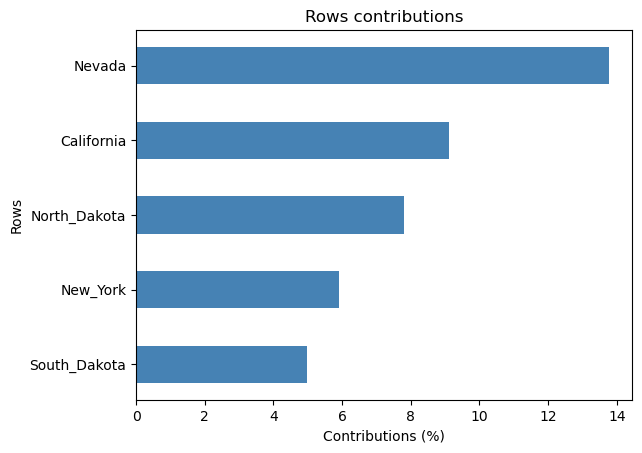

In [32]:
# plot : contributions to the first factor
acp.plot_row_contrib(num_axis=1,nb_values=5)

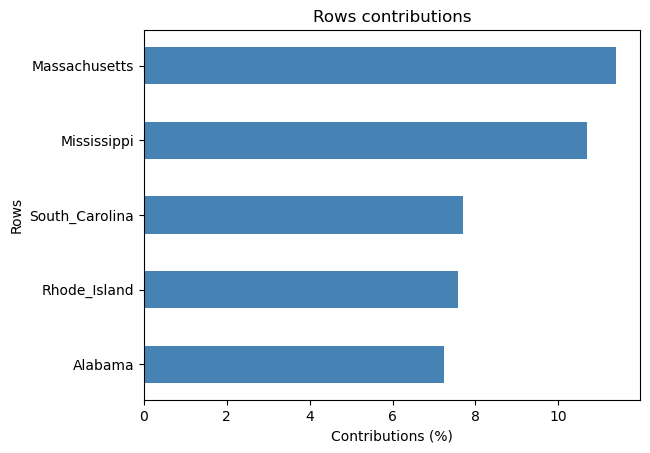

In [33]:
# plot : contributions to the second factor
acp.plot_row_contrib(num_axis=2,nb_values=5)

### Transition relationships

In [34]:
# Coordinates of individuals from variables - Factor 1
f1 = 1/math.sqrt(acp.eig_[0][0]) * np.dot(Z,acp.col_coord_[:,0])

# print and check coordinates
print(pd.DataFrame(np.transpose(np.array([f1,acp.row_coord_[:,0]])),index=D.index, columns=['transition','actual']))

                transition    actual
statename                           
Alabama           0.050387  0.050387
Alaska           -2.446100 -2.446100
Arizona          -3.044739 -3.044739
Arkansas          1.065115  1.065115
California       -4.327295 -4.327295
Colorado         -2.534768 -2.534768
Connecticut       0.546825  0.546825
Delaware         -0.974374 -0.974374
Florida          -3.143346 -3.143346
Georgia          -0.495386 -0.495386
Hawaii           -0.831488 -0.831488
Idaho             1.446997  1.446997
Illinois         -0.518110 -0.518110
Indiana           0.504971  0.504971
Iowa              2.607771  2.607771
Kansas            0.640504  0.640504
Kentucky          1.744441  1.744441
Louisiana        -1.131575 -1.131575
Maine             1.844852  1.844852
Maryland         -2.204959 -2.204959
Massachusetts    -0.988373 -0.988373
Michigan         -2.296415 -2.296415
Minnesota         1.570123  1.570123
Mississippi       1.522662  1.522662
Missouri         -0.562015 -0.562015
M

In [35]:
# Coordinates of variables from individuals - Factor 1
r1 = 1/(n*math.sqrt(acp.eig_[0][0])) * np.dot(np.transpose(Z),acp.row_coord_[:,0])

# print and check correlations
print(pd.DataFrame(np.transpose(np.array([r1,acp.col_coord_[:,0]])),index=D.columns, columns=['transition','actual']))

                  transition    actual
murder             -0.609127 -0.609127
rape               -0.875840 -0.875840
armedrobbery       -0.805076 -0.805076
aggression         -0.804622 -0.804622
breakintheft       -0.892875 -0.892875
pickpocketing      -0.724917 -0.724917
trafficviolation   -0.598777 -0.598777


### Projecting supplementary individuals

In [36]:
# load supplementary observations
IndSup = pd.read_csv('crime_en.txt', sep='\t', index_col=0)
print(IndSup)

                murder  rape  armedrobbery  aggression  breakintheft  \
statename                                                              
Alabama           14.2  25.2          96.8       278.3        1135.5   
Alaska            10.8  51.6          96.8       284.0        1331.7   
Arizona            9.5  34.2         138.2       312.3        2346.1   
Arkansas           8.8  27.6          83.2       203.4         972.6   
California        11.5  49.4         287.0       358.0        2139.4   
Colorado           6.3  42.0         170.7       292.9        1935.2   
Connecticut        4.2  16.8         129.5       131.8        1346.0   
Delaware           6.0  24.9         157.0       194.2        1682.6   
Florida           10.2  39.6         187.9       449.1        1859.9   
Georgia           11.7  31.1         140.5       256.5        1351.1   
Hawaii             7.2  25.5         128.0        64.1        1911.5   
Idaho              5.5  19.4          39.6       172.5        10

In [37]:
# apply transform on the supplementary observations
coordSup = acp.transform(IndSup.values)
print(coordSup)

[[ 5.03866430e-02 -2.11738312e+00 -5.06737549e-01 -2.53533382e-01
   5.03546990e-01  4.38020729e-01  1.19273718e-01]
 [-2.44609952e+00  1.68213679e-01  7.04391434e-02 -1.17225334e+00
   1.48497546e+00 -1.51301170e+00  4.69527104e-01]
 [-3.04473945e+00  8.53523426e-01  1.76973694e+00  1.17391684e-01
   2.83055760e-01  1.08130788e+00  5.80989189e-02]
 [ 1.06511538e+00 -1.35910001e+00  1.85236119e-02 -2.17550132e-02
   2.29185725e-02 -3.89956291e-01 -3.13819273e-01]
 [-4.32729524e+00  1.44641110e-01 -2.78958608e-01 -2.53768363e-02
   5.85192438e-02 -3.80912964e-01 -4.68724417e-01]
 [-2.53476822e+00  9.25902176e-01  1.16327185e+00 -1.13745704e-01
  -1.70950079e-01 -3.34395619e-01 -2.43103057e-01]
 [ 5.46825358e-01  1.51647081e+00 -7.91843646e-01 -8.70654145e-02
   1.86763194e-01  2.84257024e-01 -9.05346065e-02]
 [-9.74373602e-01  1.30990789e+00  5.31203571e-01  4.21561299e-01
  -1.89146244e-02  4.07658134e-01  2.08257785e-01]
 [-3.14334620e+00 -6.10047943e-01  1.22774473e+00 -5.00101467e-0

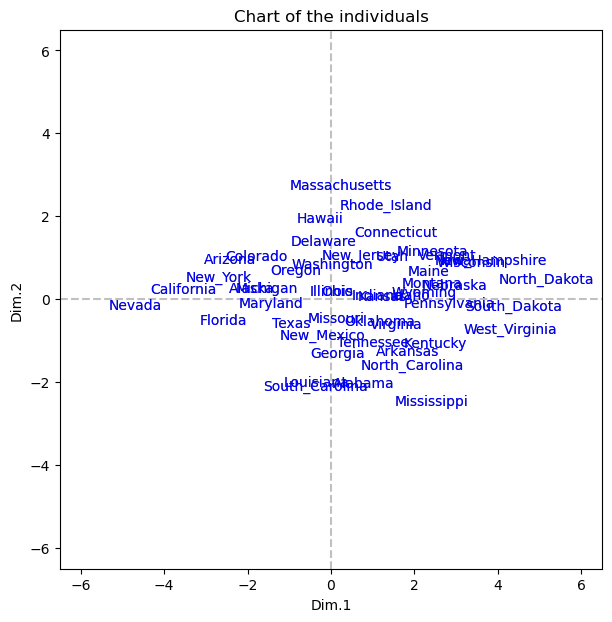

In [38]:
# plot supplementary observations
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-6.5,+6.5,-6.5,+6.5])
ax.plot([-6.5,+6.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-6.5,+6.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Chart of the individuals")

# active data points
for i in range(n):
    ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i],color="dimgray")
    
# supplementary data points
for i in range(IndSup.shape[0]):
    ax.text(coordSup[i,0],coordSup[i,1],IndSup.index[i],color="blue")
    
plt.show()